In [1]:
import sys
import subprocess
import pkg_resources
import pkgutil
print("pip list | grep qiskit:")
subprocess.run([sys.executable, "-m", "pip", "list", "--disable-pip-version-check"], stdout=subprocess.PIPE).stdout.decode().splitlines()
# 2. What Qiskit packages are installed?
print("\npip list output:")
for line in subprocess.run(
    [sys.executable, "-m", "pip", "list", "--disable-pip-version-check"],
    stdout=subprocess.PIPE
).stdout.decode().splitlines():
    if "qiskit" in line.lower():
        print(" ", line)

# 3. Is qiskit-aer present?
try:
    dist = pkg_resources.get_distribution("qiskit-aer")
    print(f"\nqiskit‑aer version: {dist.version}")
except pkg_resources.DistributionNotFound:
    print("\nqiskit‑aer is NOT installed")

# 4. What qiskit modules can Python actually see?
print("\nqiskit-related modules found:")
print([m.name for m in pkgutil.iter_modules() if "qiskit" in m.name])

C:\Users\ereci\AppData\Local\Temp\ipykernel_113956\2725643963.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


pip list | grep qiskit:

pip list output:
  qiskit                  2.0.0
  qiskit-aer              0.17.0

qiskit‑aer version: 0.17.0

qiskit-related modules found:
['qiskit', 'qiskit_aer']


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# 1 qubit + 1 cbit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)           

sim = AerSimulator()
job = sim.run(qc, shots=1024)  
result = job.result()

counts = result.get_counts()   
print(counts)          

{'1': 488, '0': 536}


In [2]:
!pip install matplotlib

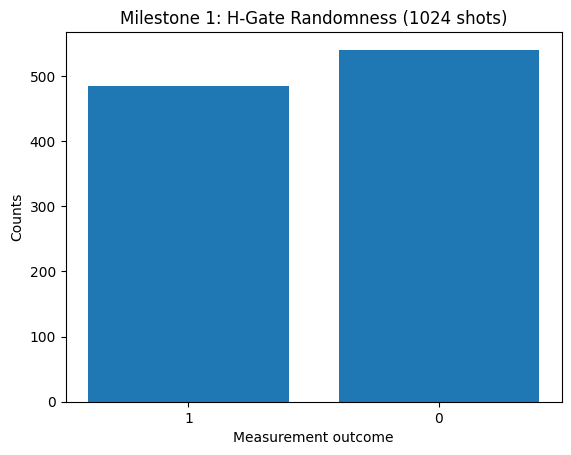

In [3]:

import matplotlib.pyplot as plt


qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)


sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()  


plt.bar(counts.keys(), counts.values())
plt.xlabel('Measurement outcome')
plt.ylabel('Counts')
plt.title('Milestone 1: H‑Gate Randomness (1024 shots)')
plt.show()